In [1]:
# Import proper library
import sys
import numpy as np
import scipy as sp
from ldfa import LDFA
import matplotlib.pyplot as plt

%load_ext autoreload

In [2]:
# Data preprocessing

# Iris data
X_iris = np.genfromtxt('./data/iris.data', delimiter=',', usecols=(0,1,2,3), dtype=float)
y_iris = np.genfromtxt('./data/iris.data', delimiter=',', usecols=(4), dtype=str)
y_iris[y_iris=='Iris-setosa'] = 1
y_iris[y_iris=='Iris-versicolor'] = 2
y_iris[y_iris=='Iris-virginica'] = 3
y_iris = y_iris.astype(int)

# Wine data
X_wine = np.genfromtxt('./data/wine.data', delimiter=',', usecols=(1,2,3,4,5,6,7,8,9,10,11,12,13), dtype=float)
y_wine = np.genfromtxt('./data/wine.data', delimiter=',', usecols=(0), dtype=int)

# Classes
classes = [1,2,3]

In [16]:
%autoreload
# LDFA

# Initiate fld instances for each data set
ldfa_iris = LDFA(X_iris, y_iris, classes)
ldfa_wine = LDFA(X_wine, y_wine, classes)

# Train each intance
ldfa_iris.train()
ldfa_wine.train()

In [17]:
%autoreload
# Iris performance test

# k-NN hyperparameter
k_list = {1: [], 2: [], 3: [], 5: [], 10: []}

# v-fold validation
v = 5
N = X_iris.shape[0]
step_size = int(N/v)
v_indices = np.random.permutation(np.arange(N))

for i in range(v):
    low = i*step_size
    high = (i+1)*step_size
    v_index = v_indices[low:high]
    
    # Data set separation
    X_iris_val = X_iris[v_index]
    X_iris_train = np.delete(X_iris, v_index, axis=0)
    y_iris_val = y_iris[v_index]
    y_iris_train = np.delete(y_iris, v_index, axis=0)
    
    # LDFA on training set
    ldfa = LDFA(X_iris_train, y_iris_train, classes)
    ldfa.train()
    
    # k-NN algorithm & Measure accuracy
    # Transform the samples onto the new subspace
    X_iris_val = np.matmul(X_iris_val, ldfa.W)
    X_iris_train = np.matmul(X_iris_train, ldfa.W)
    
    # Calculate distance from val data to train data
    num_val = X_iris_val.shape[0]
    num_train = X_iris_train.shape[0]
    x2 = np.sum(X_iris_val**2, axis=1).reshape((num_val, 1))
    y2 = np.sum(X_iris_train**2, axis=1).reshape((1, num_train))
    xy = X_iris_val.dot(X_iris_train.T)
    dists = np.sqrt(x2+y2-2*xy)
    
    # Predict label for each k in k-NN
    for k in k_list:
        y_pred = np.zeros(num_val)
        for i in range(num_val):
            closest_x = list(np.argsort(dists[i,:]))[0:k] # k
            closest_y = [y_iris_train[x] for x in closest_x]
            y_pred[i] = np.argmax(np.bincount(np.array(closest_y)))
        accuracy = np.sum(y_iris_val==y_pred) / num_val
        k_list[k].append(accuracy)
    
# Print accuracy for each k
for k in k_list:
    print('In iris, k is %d and averaged accuracy is %f' %(k, sum(k_list[k])/float(len(k_list[k]))))


In iris, k is 10 and averaged accuracy is 0.980000
In iris, k is 1 and averaged accuracy is 0.966667
In iris, k is 2 and averaged accuracy is 0.960000
In iris, k is 3 and averaged accuracy is 0.966667
In iris, k is 5 and averaged accuracy is 0.966667


In [18]:
%autoreload
# Wine performance test

# k-NN hyperparameter
k_list = {1: [], 2: [], 3: [], 5: [], 10: []}

# v-fold validation
v = 5
N = X_wine.shape[0]
step_size = int(N/v)
v_indices = np.random.permutation(np.arange(N))

for i in range(v):
    low = i*step_size
    high = (i+1)*step_size
    v_index = v_indices[low:high]
    
    # Data set separation
    X_wine_val = X_wine[v_index]
    X_wine_train = np.delete(X_wine, v_index, axis=0)
    y_wine_val = y_wine[v_index]
    y_wine_train = np.delete(y_wine, v_index, axis=0)
    
    # FLD on training set
    ldfa = LDFA(X_wine_train, y_wine_train, classes)
    ldfa.train()
    
    # k-NN algorithm & Measure accuracy
    # Transform the samples onto the new subspace
    X_wine_val = np.matmul(X_wine_val, ldfa.W)
    X_wine_train = np.matmul(X_wine_train, ldfa.W)
    
    # Calculate distance from val data to train data
    num_val = X_wine_val.shape[0]
    num_train = X_wine_train.shape[0]
    x2 = np.sum(X_wine_val**2, axis=1).reshape((num_val, 1))
    y2 = np.sum(X_wine_train**2, axis=1).reshape((1, num_train))
    xy = X_wine_val.dot(X_wine_train.T)
    dists = np.sqrt(x2+y2-2*xy)
    
    # Predict label for each k in k-NN
    for k in k_list:
        y_pred = np.zeros(num_val)
        for i in range(num_val):
            closest_x = list(np.argsort(dists[i,:]))[0:k] # k
            closest_y = [y_wine_train[x] for x in closest_x]
            y_pred[i] = np.argmax(np.bincount(np.array(closest_y)))
        accuracy = np.sum(y_wine_val==y_pred) / num_val
        k_list[k].append(accuracy)
    
# Print accuracy for each k
for k in k_list:
    print('In wine, k is %d and averaged accuracy is %f' %(k, sum(k_list[k])/float(len(k_list[k]))))


In wine, k is 10 and averaged accuracy is 0.988571
In wine, k is 1 and averaged accuracy is 0.982857
In wine, k is 2 and averaged accuracy is 0.977143
In wine, k is 3 and averaged accuracy is 0.988571
In wine, k is 5 and averaged accuracy is 0.988571


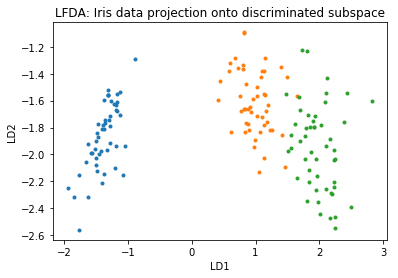

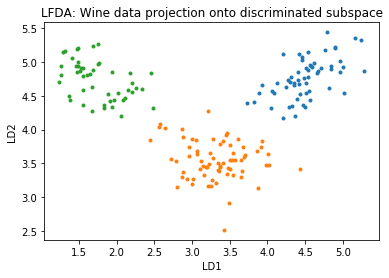

In [21]:
# Plot some results
# Sample FLD instance for plotting
ldfa_iris = LDFA(X_iris, y_iris, classes)
ldfa_wine = LDFA(X_wine, y_wine, classes)

# Train each intance
ldfa_iris.train()
ldfa_wine.train()

# Project each data set
XW_iris = np.matmul(X_iris, ldfa_iris.W)
XW_wine = np.matmul(X_wine, ldfa_wine.W)

# Projected to subspace of iris data
fig1 = plt.figure()
for c in classes:
    XW_temp = XW_iris[y_iris==c]
    plt.plot(XW_temp[:,0], XW_temp[:,1], '.')
plt.title('LFDA: Iris data projection onto discriminated subspace')
plt.xlabel('LD1')
plt.ylabel('LD2')

# Projected to subspace of wine data
fig2 = plt.figure()
for c in classes:
    XW_temp = XW_wine[y_wine==c]
    plt.plot(XW_temp[:,0], XW_temp[:,1], '.')
plt.title('LFDA: Wine data projection onto discriminated subspace')
plt.xlabel('LD1')
plt.ylabel('LD2')

# Show figures
plt.show()